In [1]:
#written 1.17.24 by @caramnix (last udpdated 1.25)

#goal: have a single csv for each congress with the following columns 
#Tweet- date- icpsr- member name - party - female - black - cleaned text- sentiment score 

# currently tweet data is stored in separate csv's so we want to merge them together -- nope used cat *.csv >combined.csv
# to combine so data is stored in combined_115,6,7.csv 

#so now want to read this in! do think it may have made more sense to do in chunks but idk we'll see 


In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caranix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tweets_116= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/cleaned_116_ordered/combined_116.csv")



In [3]:
#tweets_116.head()

In [4]:
tweets_116.iloc[400:450] # note, header column incuded-- need to remove 

,index,source,lang,text,possibly_sensitive,author_id,id,conversation_id,created_at,entities.mentions,...,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,entities.annotations,entities.urls,referenced_tweets,attachments.media_keys,in_reply_to_user_id,username
400,400,Twitter for iPhone,en,Right now is the moment to decide if you are p...,FALSE,138203134,1213185646665371649,1213184923626070017,2020-01-03T19:49:32.000Z,NaN,...,8250,1063,40263,309,"[{'start': 180, 'end': 183, 'probability': 0.9...",NaN,"[{'type': 'replied_to', 'id': '121318492362607...",NaN,138203134,AOC
401,401,Twitter for iPhone,en,Last night the President engaged in what is wi...,FALSE,138203134,1213184923626070017,1213184923626070017,2020-01-03T19:46:40.000Z,NaN,...,16719,7179,98342,1212,"[{'start': 93, 'end': 96, 'probability': 0.905...",NaN,NaN,NaN,NaN,AOC
402,402,Twitter for iPhone,en,This is just the beginning of our new climate ...,FALSE,138203134,1212884939122905088,1212884939122905088,2020-01-02T23:54:38.000Z,NaN,...,10773,2375,44512,382,NaN,"[{'start': 280, 'end': 303, 'url': 'https://t....","[{'type': 'quoted', 'id': '1212523804620152832'}]",NaN,NaN,AOC
403,403,Twitter for iPhone,en,RT @MaraGay: We cannot let our Jewish neighbor...,FALSE,138203134,1212831794548088835,1212831794548088835,2020-01-02T20:23:27.000Z,"[{'start': 3, 'end': 11, 'username': 'MaraGay'...",...,846,0,0,0,NaN,"[{'start': 60, 'end': 83, 'url': 'https://t.co...","[{'type': 'retweeted', 'id': '1212486063538819...",NaN,NaN,AOC
404,404,Twitter for iPhone,en,"RT @GuthrieGF: This is how @AOC defined ""A Cul...",FALSE,138203134,1212778713760309251,1212778713760309251,2020-01-02T16:52:32.000Z,"[{'start': 3, 'end': 13, 'username': 'GuthrieG...",...,1249,0,0,0,"[{'start': 115, 'end': 118, 'probability': 0.9...",NaN,"[{'type': 'retweeted', 'id': '1212763353141194...",NaN,NaN,AOC
405,405,Twitter for iPhone,en,I’m really proud of @JulianCastro and his camp...,FALSE,138203134,1212774349356371968,1212774349356371968,2020-01-02T16:35:11.000Z,"[{'start': 20, 'end': 33, 'username': 'JulianC...",...,3126,775,32937,119,"[{'start': 245, 'end': 250, 'probability': 0.8...","[{'start': 281, 'end': 304, 'url': 'https://t....","[{'type': 'quoted', 'id': '1212738343588511747'}]",NaN,NaN,AOC
406,406,Twitter for iPhone,en,RT @theintercept: What if we actually pulled o...,FALSE,138203134,1212429913007017986,1212429913007017986,2020-01-01T17:46:31.000Z,"[{'start': 3, 'end': 16, 'username': 'theinter...",...,1098,0,0,0,NaN,NaN,"[{'type': 'retweeted', 'id': '1212391780353634...",NaN,NaN,AOC
407,407,Twitter for iPhone,en,RT @corbintrent: I know we can get #SouthDakot...,FALSE,138203134,1212225088931713029,1212225088931713029,2020-01-01T04:12:37.000Z,"[{'start': 3, 'end': 15, 'username': 'corbintr...",...,226,0,0,0,NaN,"[{'start': 88, 'end': 111, 'url': 'https://t.c...","[{'type': 'retweeted', 'id': '1212222862972596...",['3_1212222858337947648'],NaN,AOC
408,408,Twitter for iPhone,en,Returning home heartsick over the attacks in M...,FALSE,138203134,1212156192996438017,1212156192996438017,2019-12-31T23:38:51.000Z,NaN,...,1060,786,8550,84,"[{'start': 45, 'end': 50, 'probability': 0.993...","[{'start': 293, 'end': 316, 'url': 'https://t....","[{'type': 'quoted', 'id': '1212143559626952710'}]",NaN,NaN,AOC
409,409,Twitter for iPhone,en,Keep going! You’re so close to getting it! ☺️🛫...,FALSE,138203134,1210254723531657217,1210254723531657217,2019-12-26T17:43:06.000Z,NaN,...,6962,1646,58460,320,NaN,"[{'start': 47, 'end': 70, 'url': 'https://t.co...","[{'type': 'quoted', 'id': '1209551135738126337'}]",NaN,NaN,AOC


In [5]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def label_header(text):
    if "index" in text: 
        return 1 
    else: 
        return 0 


In [6]:
tweets_116['header'] = tweets_116['index'].apply(lambda x: label_header(x))

In [7]:
# remove headers
tweets_116= tweets_116[tweets_116['header']  == 0]

In [8]:
len(tweets_116)

1016907

In [9]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def clean_string(text):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove emojis 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text= emoji_pattern.sub(r'', text)
    
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    text = text.split()
    useless_words = [] 
    text_filtered = [word for word in text if not word in useless_words]
    
    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    
    final_string = ' '.join(text_filtered)
    
    return final_string


In [10]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def stem_string(text, stem="None"):

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string


In [11]:
#stem_string("mccarthy earned the right to be the speaker an")

In [12]:
tweets_116['text']= tweets_116['text'].astype(str)

In [13]:
tweets_116['text_clean'] = tweets_116['text'].apply(lambda x: clean_string(x))
tweets_116['text_clean_no_stop_words'] = tweets_116['text_clean'].apply(lambda x: stem_string(x, stem='None'))

In [14]:
tweets_116['referenced_tweets']= tweets_116['referenced_tweets'].astype(str)

In [15]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def label_rt(text):
    if "retweeted" in text: 
        return 1 
    else: 
        return 0 



In [17]:
tweets_116['RT'] = tweets_116['referenced_tweets'].apply(lambda x: label_rt(x))

In [18]:
tweets_116_cut = tweets_116[tweets_116["RT"] == 0]

In [20]:
#tweets_116_retweets= tweets_116[tweets_116["RT"] == 1]
#agree that RT's should be cut 

In [20]:
#tweets_116_cut

In [184]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#analyzer = SentimentIntensityAnalyzer()
#sentence = "The food was great!"
#vs = analyzer.polarity_scores(sentence)
#print("{:-<65} {}".format(sentence, str(vs)))

In [ ]:
#he compound score is computed by summing the valence scores of each word in the lexicon, 
#adjusted according to the rules, and then normalized to be between -1 (most extreme negative) 
#and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional 
#measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.




In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_score(text): 
    vs= analyzer.polarity_scores(text)
    return vs['compound']

In [22]:
tweets_116_cut['vader_score'] = tweets_116_cut['text_clean_no_stop_words'].apply(lambda x: vader_score(x))

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/1900129890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_116_cut['vader_score'] = tweets_116_cut['text_clean_no_stop_words'].apply(lambda x: vader_score(x))


In [24]:
#tweets_116_cut.head()

In [27]:
tweets_116_cut.loc[944630:944635]

,index,source,lang,text,possibly_sensitive,author_id,id,conversation_id,created_at,entities.mentions,...,entities.urls,referenced_tweets,attachments.media_keys,in_reply_to_user_id,username,header,text_clean,text_clean_no_stop_words,RT,vader_score
944630,38,Twitter Web App,en,"I'm sure @SenatorCollins has ""very serious con...",FALSE,377609596,1.277752134226727e+18,1277752134226726913,2020-06-29T23:53:42.000Z,"[{'start': 9, 'end': 24, 'username': 'SenatorC...",...,"[{'start': 179, 'end': 202, 'url': 'https://t....","[{'type': 'quoted', 'id': '1277621143176806400'}]",NaN,NaN,ericswalwell,0,im sure senatorcollins has very serious concer...,sure senatorcollins serious concerns perhaps s...,0,-0.5200
944631,39,NaN,NaN,We dodged a big loss today. But this court wil...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,NaN,NaN,NaN,0,we dodged a big loss today but this court will...,dodged big loss today court keep trying restri...,0,-0.3182
944633,40,Twitter for iPhone,en,When I wrote a book about Russia &amp; impeach...,FALSE,377609596,1.2776239175161324e+18,1277623917516132352,2020-06-29T15:24:13.000Z,"[{'start': 120, 'end': 136, 'username': 'realD...",...,"[{'start': 200, 'end': 223, 'url': 'https://t....",nan,['7_1277623870934200321'],NaN,ericswalwell,0,when i wrote a book about russia amp impeachme...,wrote book russia amp impeachment unsure would...,0,-0.2500
944634,41,Twitter Web App,en,"Hi, Mark - doing great, thanks for asking! We ...",FALSE,377609596,1.2776175012668662e+18,1277617501266866177,2020-06-29T14:58:43.000Z,NaN,...,"[{'start': 193, 'end': 216, 'url': 'https://t....",nan,NaN,NaN,ericswalwell,0,hi mark doing great thanks for asking we had ...,mark great thanks asking people tune one endga...,0,0.8591
944635,42,Twitter Web App,en,"An important, welcome, &amp; surprising victor...",FALSE,377609596,1.2776158730799677e+18,1277615873079967744,2020-06-29T14:52:15.000Z,NaN,...,"[{'start': 254, 'end': 277, 'url': 'https://t....",nan,NaN,NaN,ericswalwell,0,an important welcome amp surprising victory bu...,important welcome amp surprising victory note ...,0,0.4939


In [26]:
tweets_116_cut= tweets_116_cut.drop([944632]) # ONE PROBLEM ONE! 

In [28]:
# read in demographics from 116th (party, gender, race)

path= "/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/"

leg_116= pd.read_csv(path + "116_leg_les.csv")

In [29]:
#leg_116.columns

In [30]:
leg_116_s= leg_116[["handle", "icpsr", "Female", "party_code", "African.American", "Latinx"]]


In [32]:
#leg_116_s

In [228]:
#leg_117_s= leg_117_s.rename(columns={"state_abbrev.y": "state_abbrev", "party_code.y": "party_code"})

In [33]:
## to lower handles and usernames 

leg_116_s['handle']= leg_116_s['handle'].str.lower()
tweets_116_cut["username"] = tweets_116_cut["username"].str.lower()

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/3833778432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leg_116_s['handle']= leg_116_s['handle'].str.lower()


In [34]:
tweets_116_merged= tweets_116_cut.merge(leg_116_s, how='left', left_on='username', right_on="handle")

In [36]:
#tweets_116_merged

In [37]:
#tweets_116_merged.to_csv("tweets_116_merged_v2.csv", index= False)

In [54]:
#tweets_116_merged

Index(['index', 'source', 'lang', 'text', 'possibly_sensitive', 'author_id',
       'id', 'conversation_id', 'created_at', 'entities.mentions',
       'entities.hashtags', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'entities.annotations', 'entities.urls',
       'referenced_tweets', 'attachments.media_keys', 'in_reply_to_user_id',
       'username', 'header', 'text_clean', 'text_clean_stem', 'RT',
       'vader_score', 'handle', 'icpsr', 'Female', 'party_code',
       'African.American', 'Latinx'],
      dtype='object')

In [3]:
#tweets_116_merged = pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_116_merged_v2.csv")


/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_1058/2270933907.py:1: DtypeWarning: Columns (1,5,6,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_116_merged = pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_116_merged.csv")


In [38]:
np.mean(tweets_116_merged['vader_score'])

0.2405715471541116

In [39]:
# rep mean for 116
np.mean(tweets_116_merged[tweets_116_merged['party_code'] == 200.0]['vader_score'])

0.28660849404538097

In [40]:
# democrats less positive tweets than reps 
np.mean(tweets_116_merged[tweets_116_merged['party_code'] == 100.0]['vader_score'])

0.21970462707742602

In [7]:
# can we plot sentiment by party over time? average by week? 

In [41]:
date_2_parts= tweets_116_merged.created_at.str.split("T", n=1, expand=True)
tweets_116_merged['date'] = date_2_parts[0]
tweets_116_merged['date'] =  pd.to_datetime(tweets_116_merged['date'], format='%Y-%m-%d')

In [42]:
tweets_116_merged['date'] = date_2_parts[0]


In [43]:
tweets_116_merged['date'] =  pd.to_datetime(tweets_116_merged['date'], format='%Y-%m-%d')

<Axes: xlabel='date'>

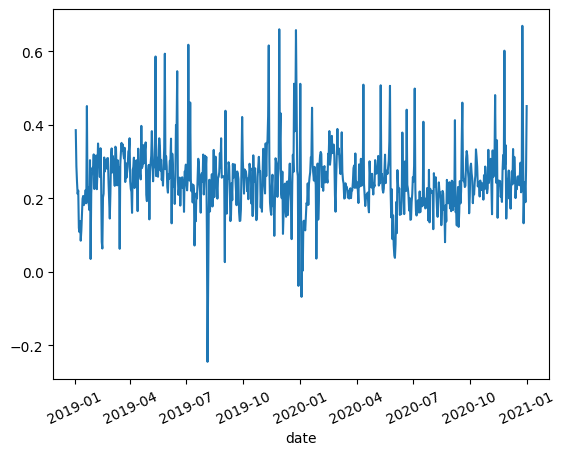

In [44]:
import matplotlib.pyplot as plt

tweets_116_merged.groupby(tweets_116_merged['date'].dt.date)["vader_score"].mean().plot(kind="line",rot=25)

In [45]:
import seaborn as sns 

In [46]:
tweets_116_merged['party_code'].unique()

array([100., 200.,  nan, 328.])

In [76]:
tweets_116_merged["party"] = np.where(tweets_116_merged['party_code']== 200.0, 0,
                                      np.where(tweets_116_merged['party_code']== 328.0, 0,
                                      np.where(tweets_116_merged['party_code']== 100.0, 1, "nan")))
                                      
                                      
                                      
                                      

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/672618659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_116_merged["party"] = np.where(tweets_116_merged['party_code']== 200.0, 0,


In [49]:
# 9 na tweets, from repwatkins, let's delete them! 
#tweets_116_merged[tweets_116_merged["party"] =="nan"]

In [50]:
tweets_116_merged= tweets_116_merged[tweets_116_merged["party"] !="nan"]

In [79]:
tweets_116_merged["party"]= tweets_116_merged["party"].astype("int64")

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/1459884603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_116_merged["party"]= tweets_116_merged["party"].astype("int64")


In [53]:
tweets_116_merged.iloc[11].text_clean

'i am constantly asked if i‘d support the dem nominee could you imagine if i said i wouldn’tyet biden’s camp is on tv threatening to help trump if they don’t get exactly what they wantthis is profoundly irresponsible on all ends our country is not a game get it together '

In [19]:
#tweets_116_merged["party_temp"] = np.where(tweets_116_merged['party_code']== 200.0, "R",
#                                           np.where(tweets_116_merged['party_code']== 328.0, "R", "D"))
                                           
                                      
                     

In [80]:
palette = {
    0.0: '#fc1414', #red
    1.0: '#1f1fff', #blue
}

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/2384204153.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)


Text(0.5, 1.0, 'Average Sentiment on Twitter by Party- 116th Congress')

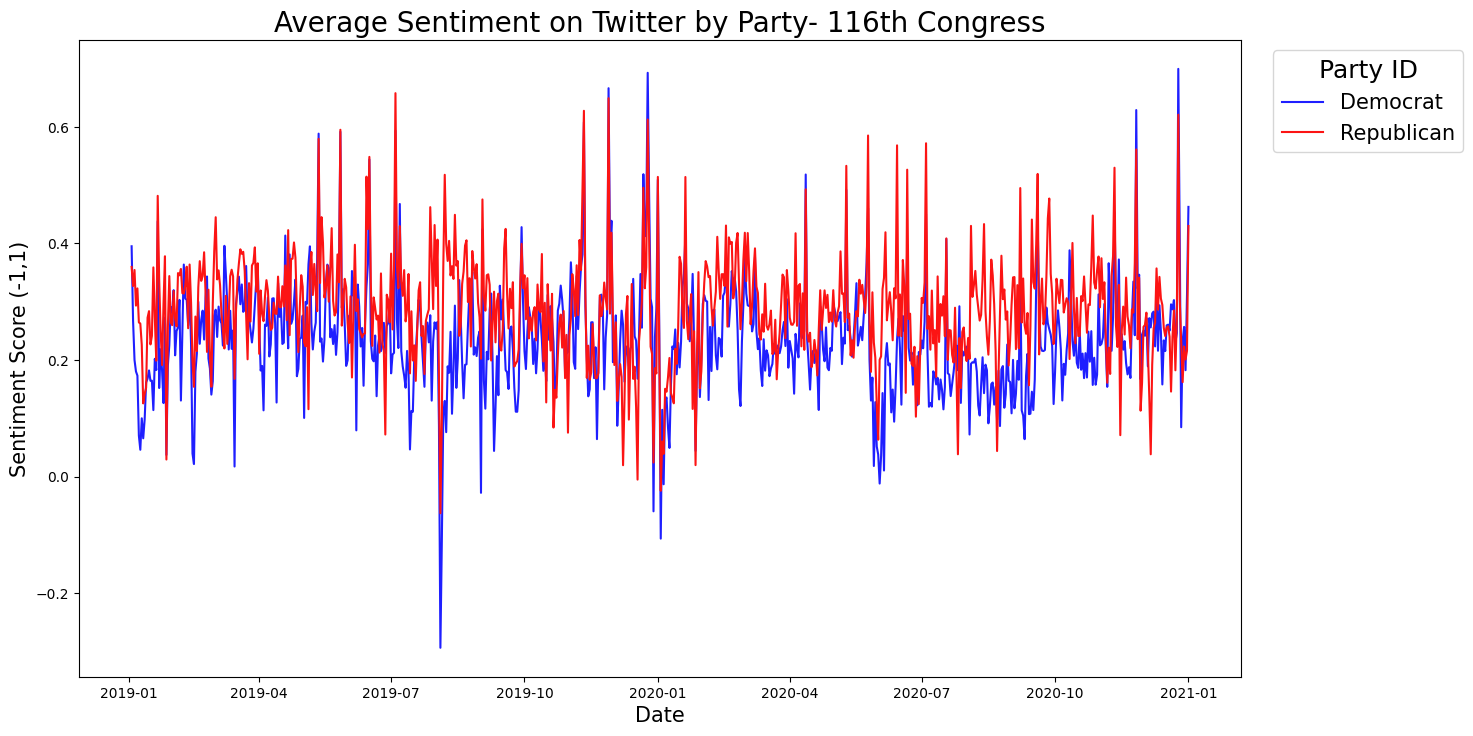

In [64]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper right', labels=['Democrat', 'Republican'],  bbox_to_anchor=(1.2, 1), title_fontsize=18, fontsize="15")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sentiment Score (-1,1)", fontsize=15)

plt.title("Average Sentiment on Twitter by Party- 116th Congress", fontsize=20)


#plt.savefig('sentiment_116.png', dpi=400)

In [44]:
tweets_116_merged['7day_rolling_avg'] = tweets_116_merged.vader_score.rolling(7).mean()

In [46]:
tweets_116_merged['10day_rolling_avg'] = tweets_116_merged.vader_score.rolling(10).mean()

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/2563024033.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)


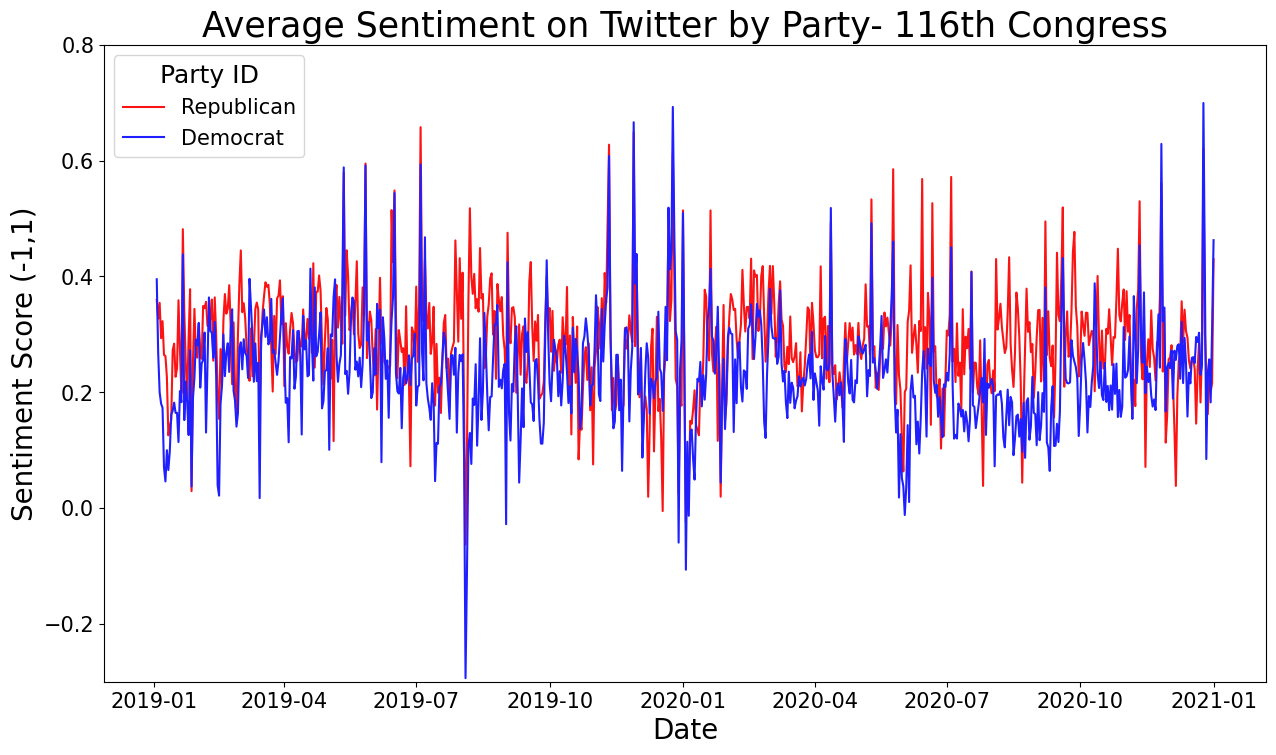

In [81]:
palette = {
    0.0: '#fc1414', #red
    1.0: '#1f1fff', #blue
}

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper left', labels=['Republican', 'Democrat'], title_fontsize=18, fontsize="15") #bbox_to_anchor=(1.15, 1)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Sentiment Score (-1,1)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.3,.8)
plt.title("Average Sentiment on Twitter by Party- 116th Congress", fontsize=25)


plt.savefig('sentiment_116_v4.png', dpi=500, bbox_inches="tight")
#v2 = 7dayrolling avg 

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_12035/2392790081.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)


Text(0.5, 1.0, 'Average Sentiment on Twitter by Party- 116th Congress')

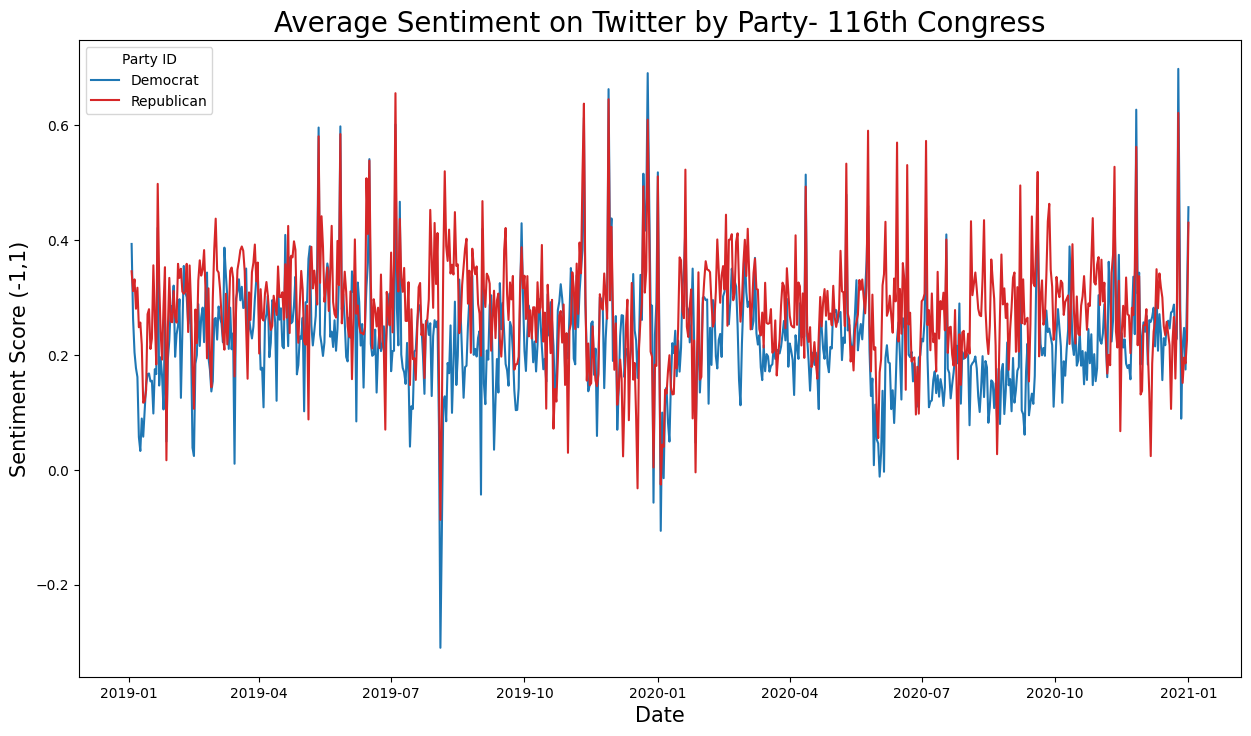

In [67]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper left', labels=['Democrat', 'Republican'])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sentiment Score (-1,1)", fontsize=15)

plt.title("Average Sentiment on Twitter by Party- 116th Congress", fontsize=20)


#plt.savefig('sentiment_116.png', dpi=400)

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_31540/2260723103.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "Female", palette= palette2, ci = None)


Text(0.5, 1.0, 'Average Sentiment on Twitter by Sex- 116th Congress')

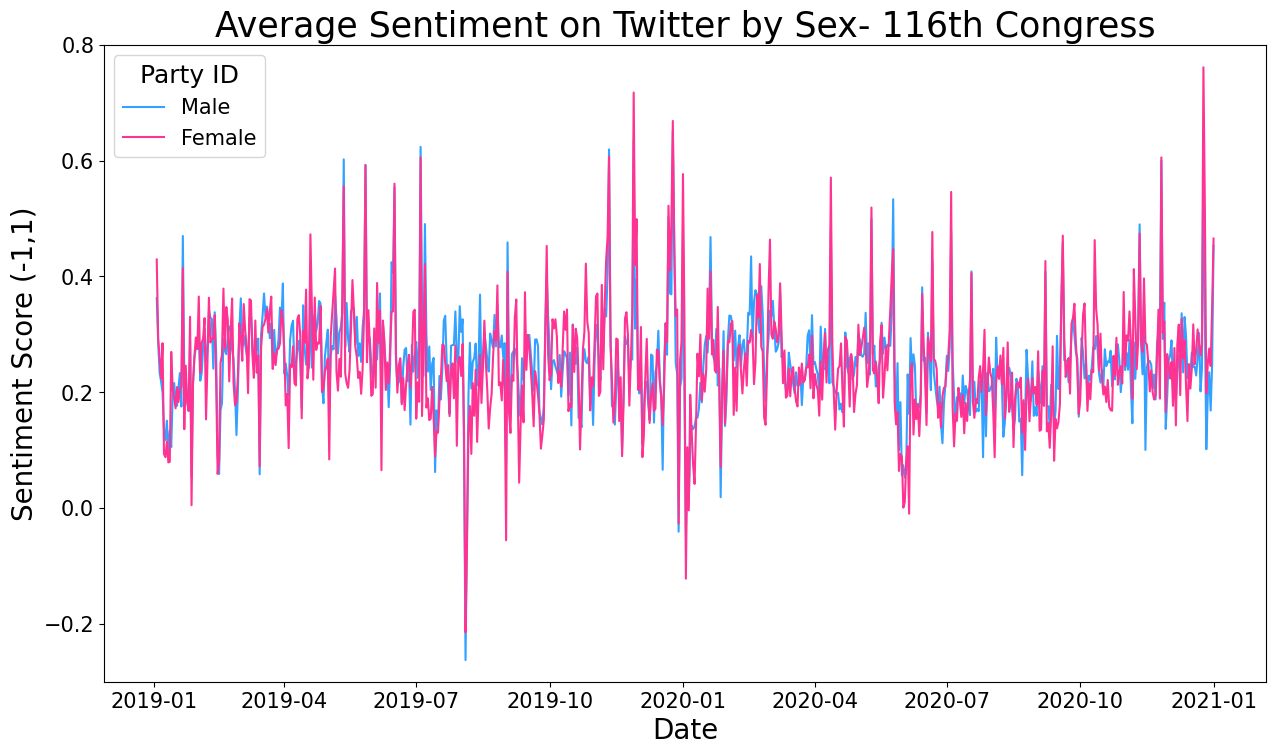

In [82]:
palette2 = {
    0.0: '#33a1ff', # blue =male
    1.0: '#ff3392', #red =female
}

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "Female", palette= palette2, ci = None)
plt.legend(title='Party ID', loc='upper left', labels=['Male', 'Female'], title_fontsize=18, fontsize="15") #bbox_to_anchor=(1.15, 1)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Sentiment Score (-1,1)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.3,.8)
plt.title("Average Sentiment on Twitter by Sex- 116th Congress", fontsize=25)


#plt.savefig('sentiment_116_v4.png', dpi=500, bbox_inches="tight")
#v2 = 7dayrolling avg 

In [84]:
# female 
np.mean(tweets_116_merged[tweets_116_merged['Female'] == 1]['vader_score'])

0.23386238022639158

In [85]:
# male 
np.mean(tweets_116_merged[tweets_116_merged['Female'] == 0]['vader_score'])

0.24456437505772183

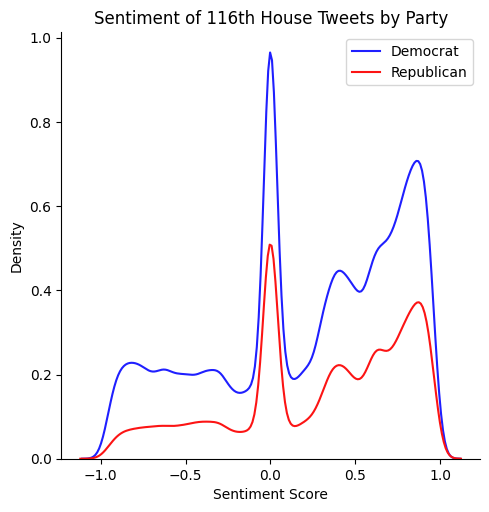

In [87]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
import matplotlib.pyplot as plt

#The units on the density axis are a common source of confusion. 
#While kernel density estimation produces a probability distribution, the height of the curve at each point gives 
#a density, not a probability. A probability can be obtained only by integrating the density across a range. 
#The curve is normalized so that the integral over all possible values is 1, 
#meaning that the scale of the density axis depends on the data values.

#palette ={0: "Red", 1: "Blue"}

sns.displot(data=tweets_116_merged, x="vader_score", hue="party", kind="kde", palette =palette, legend= False)
plt.legend(labels= ['Democrat', 'Republican'])
plt.title("Sentiment of 116th House Tweets by Party")
plt.xlabel("Sentiment Score")



plt.savefig('116thHousekde_v2.png', dpi=300, bbox_inches='tight')

#ax.legend(labels=["Republican", "Democrat"])
#plt.show(g)



#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
#plt.show(g)


In [107]:
## old code which found & delt w/ NA's 
## wait, what values are Na's 

handles_we_have_tweets_for = tweets_116_cut["username"].unique()
legs_we_have_info_for= leg_116_s["handle"].unique()


In [108]:
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

overlap= list(Intersection(handles_we_have_tweets_for, legs_we_have_info_for))#396 overlap

In [109]:
#in first but not in 2nd
s = set(overlap)
temp3 = [x for x in handles_we_have_tweets_for if x not in s]
print(temp3)

#added these by hand for 117: ['repamata', 'repbourdeaux', 'repcicilline', 'repdanbishop', 'repjacobs', 'repjamescomer', 'repjenniffer', 'repmikegarcia', 'reptiffany', 'repyoungkim'] 

['dennyheck', 'donnashalala', 'joekennedy', 'repjamescomer', 'repwatkins', 'seanduffywi', 'teamroby', 'benmcadams', 'hornforcongress', 'tomreedcongress', 'tomreedny23']


In [ ]:
repwatkins -- christine watkins 

In [121]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

text = emoji_pattern.sub(r'', tweets_117_cut.loc[742355].text_clean)


In [122]:
text

'know bestpar liber elit teacher union washington bureaucrats'